In [1]:
# For Caffe Models, we can directly use OpenCV method cv2.dnn.readNetFromCaffe() without having to use Keras
import numpy as np
import cv2
import io
import matplotlib.pyplot as plt
from IPython.display import clear_output, Image, display

In [2]:
# Load preprocess and convert image to BLOB
# Load the image to detect, get width, height
# resize to match input size, convert to blob to pass into model
img_to_detect = cv2.imread('cv2-source-code/images/testing/scene2.jpg')
img_height = img_to_detect.shape[0]
img_width = img_to_detect.shape[1]
resized_img_to_detect = cv2.resize(img_to_detect, (300, 300)) # as per mobilenetssd.prototext file 'dim' input
img_blob = cv2.dnn.blobFromImage(resized_img_to_detect, 0.007843, (300, 300), 127.5)
# recommended scale factor is 0.007843, width, height of blob is 300 x 300, mean of 255 is 127.5

In [3]:
# Set class labels

# set of 21 class labels in alphabetical order (background + rest of 20 classes)
class_labels = ["background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]


In [4]:
# Load pre-trained model and get prediction
# loading pretrained model from protext and caffeodel files
# input preprocessed blob into model and pass through the model
# obtain the detection predictions by the model using forward() method
mobilenetssd = cv2.dnn.readNetFromCaffe('cv2-source-code/dataset/mobilenetssd.prototext', 'cv2-source-code/dataset/mobilenetssd.caffemodel')
mobilenetssd.setInput(img_blob)
obj_detections = mobilenetssd.forward()
# returned obj_detections[0, 0, index, 1], 1 => will have the prediction lclass
# 2 => will have the confidence, 3 to 7 => will have the bounding box coordinates

In [5]:
# Loop over detections, get class label, box coordinates
# loop over the detections 
no_of_detections = obj_detections.shape[2]

for index in np.arange(0, no_of_detections):
  prediction_confidence = obj_detections[0, 0 , index, 2]
  # take only predictions with confidence more than 20%
  if prediction_confidence > 0.2:
    # get the prediction label
    predicted_class_index = int(obj_detections[0, 0, index, 1])
    predicted_class_label = class_labels[predicted_class_index]

    # obtain the bounding box coordinates for actual image from resized image size
    bounding_box = obj_detections[0, 0, index, 3:7] * np.array([img_width, img_height, img_width, img_height]) 
    (start_x_pt, start_y_pt, end_x_pt, end_y_pt) = bounding_box.astype("int")

    # print the prediction in ocnsole
    predicted_class_label = "{}: {:.2f}%".format(class_labels[predicted_class_index], prediction_confidence * 100)
    print("predicted object {}: {}".format(index+1, predicted_class_label))

    # Draw rectangle and text, display the image
    cv2.rectangle(img_to_detect, (start_x_pt, start_y_pt), (end_x_pt, end_y_pt), (0, 255, 0), 2)
    cv2.putText(img_to_detect, predicted_class_label, (start_x_pt, start_y_pt-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

predicted object 1: person: 67.21%
predicted object 2: car: 65.68%
predicted object 3: person: 60.77%
predicted object 4: bus: 49.88%
predicted object 5: person: 38.47%
predicted object 6: person: 34.55%
predicted object 7: car: 26.34%


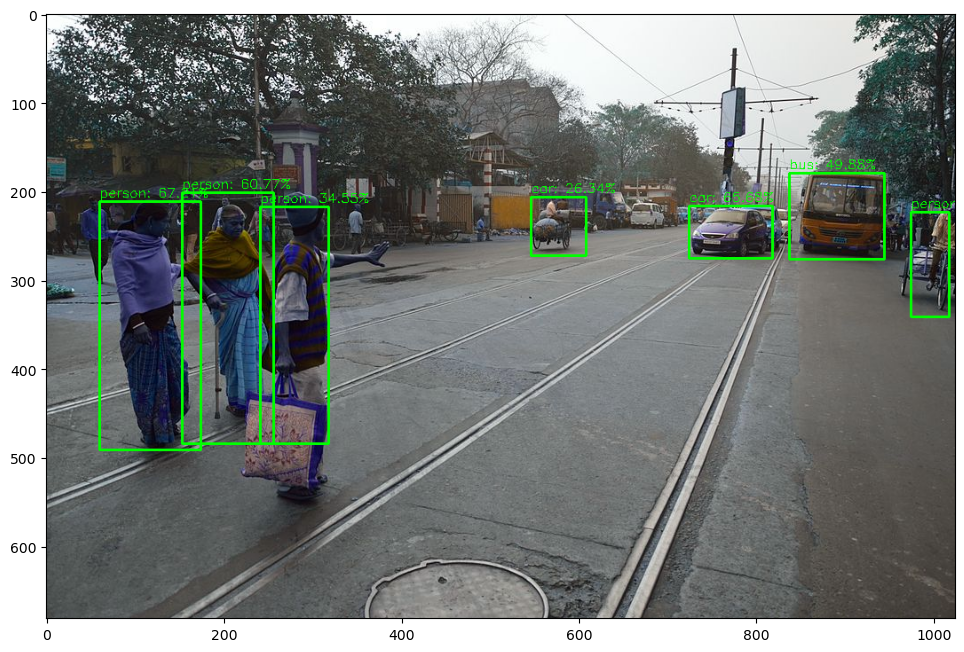

In [6]:
# show the output
# cv2.imshow("Detection Output", img_to_detect)
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(img_to_detect)
plt.show()

In [7]:
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))